# 

# 4

![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs43587-020-00017-z/MediaObjects/43587_2020_17_Fig1_HTML.png?as=webp)


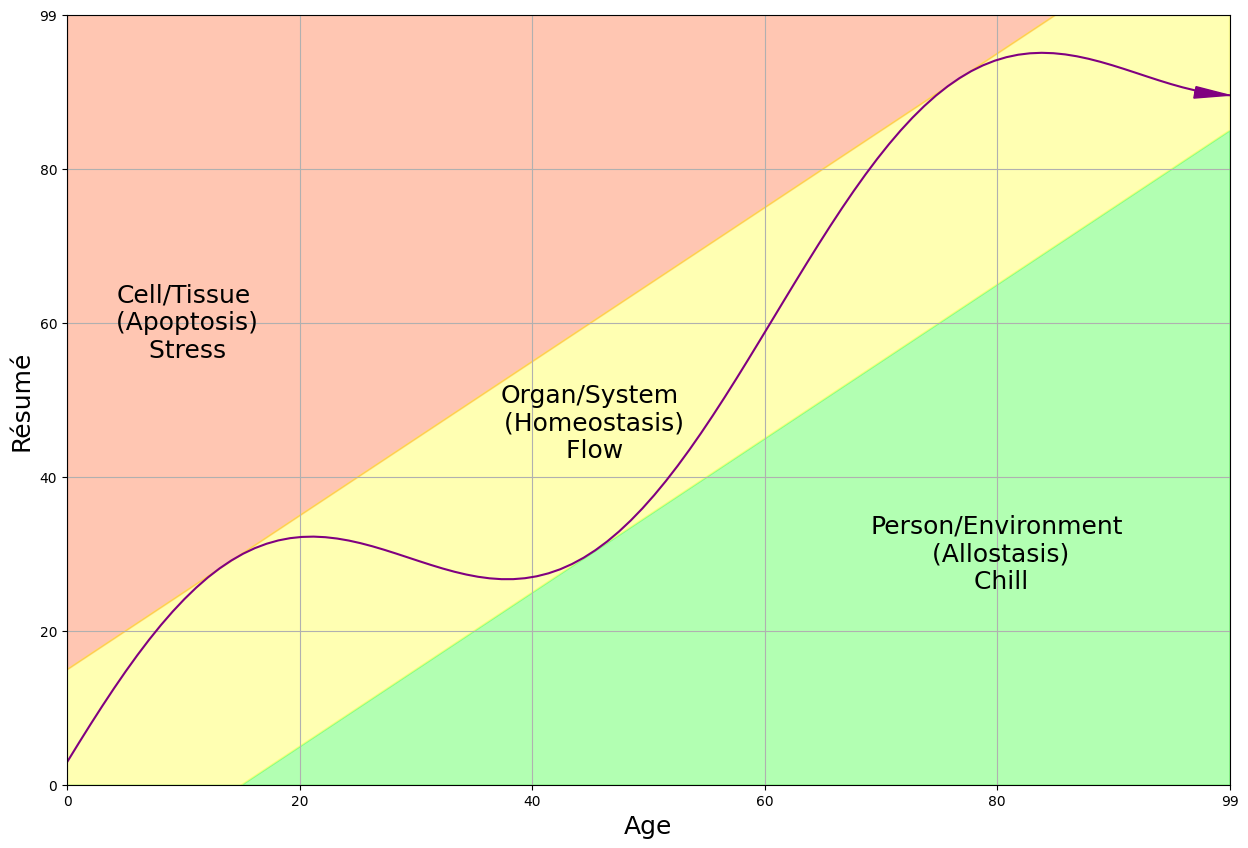

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create data for the skill and challenge levels
skill_levels = np.linspace(0, 10, 100)
challenge_levels = np.linspace(0, 10, 100)

# Define the flow channel boundaries
flow_channel = skill_levels

# Adjust the phase and amplitude of the sinusoid wave
phase = np.pi / 16
amplitude = 1.5
sinusoid = flow_channel + np.sin(skill_levels + phase) * amplitude

# Define the yellow zone boundaries, making it wider
yellow_zone_low = skill_levels - 1.5  # Adjust this value to make the yellow zone wider or narrower
yellow_zone_high = skill_levels + 1.5 # Adjust this value to make the yellow zone wider or narrower

# Plotting
plt.figure(figsize=(15, 10))

# Plot the anxiety and boredom areas
plt.fill_between(skill_levels, yellow_zone_high, 10, color='orangered', alpha=0.3, label='Place/Identification', interpolate=True)
plt.fill_between(skill_levels, 0, yellow_zone_low, color='lime', alpha=0.3, label='Time/Revelation', interpolate=True)
plt.fill_between(skill_levels, yellow_zone_low, yellow_zone_high, color='yellow', alpha=0.3, label='Agent/Evolution', interpolate=True)

# Plot the sinusoid function with the diagonal as its axis
plt.plot(skill_levels, sinusoid, color='purple', linestyle='-')

# Add arrowhead to the sinusoid line
plt.arrow(skill_levels[-2], sinusoid[-2], skill_levels[-1] - skill_levels[-2], sinusoid[-1] - sinusoid[-2],
          color='purple', length_includes_head=True, head_width=0.15, head_length=0.3)

# Set plot labels and title
plt.xlabel('Age', fontsize=18)
plt.ylabel('Résumé', rotation='vertical', fontsize=18)

# Set plot limits and grid
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid(True)

# Set tick labels
tick_labels = ['0', '20', '40', '60', '80', '99']
plt.xticks(np.linspace(0, 10, 6), tick_labels)
plt.yticks(np.linspace(0, 10, 6), tick_labels)

# Add text annotations to label the areas without shaded background
plt.text(1, 6, 'Cell/Tissue\n (Apoptosis)\n Stress', color='black', ha='center', va='center', fontsize=18)
plt.text(4.5, 4.7, 'Organ/System\n (Homeostasis)\n Flow', color='black', ha='center', va='center', fontsize=18)
plt.text(8, 3, 'Person/Environment\n (Allostasis)\n Chill', color='black', ha='center', va='center', fontsize=18)

# Display the plot
plt.show()

$
\Large
\left\{
\begin{array}{ll}
\textcolor{orangered}{\text{Wring}} \\
\text{} \\
\textcolor{#FFD700}{\text{Innovate}} \ \ 
\left\{ \begin{array}{l} \textcolor{orangered}{\text{Rig}}\textcolor{#FFD700}{\text{or}} \text{} \\ \textcolor{#FFD700}{\text{Err}}\textcolor{gray}{\text{or}} \ \ \ \ \ \ \ \ \
\left\{ \begin{array}{l} \textcolor{#FFD700}{\text{Variance}} \\ \textcolor{gray}{\text{Bias}}  \end{array} \right. \\ \textcolor{lime}{\text{Slo}}\textcolor{gray}{\text{ppy}}  \end{array} \right. 
\left\{ \begin{array}{l} \textcolor{#FFD700}{\text{Explain}}/\textcolor{gray}{\text{Control}} \end{array}  \right. \\
\text{} \\
\textcolor{lime}{\text{Regulate}}
\end{array} 
\right. 
$


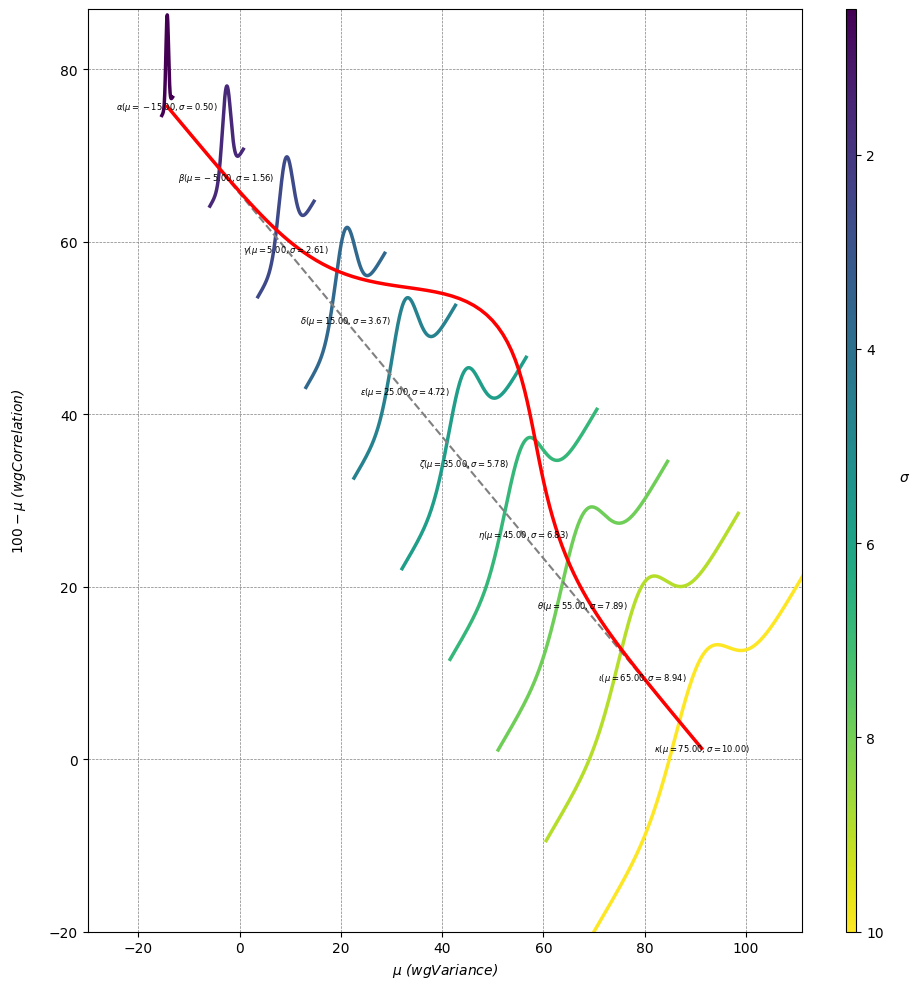

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable

# Define Gaussian Function
def gaussian(x, mean, std_dev, amplitude=1):
    return amplitude * np.exp(-0.9 * ((x - mean) / std_dev) ** 2)

# Function to overlay Gaussian on the diagonal based on start and end points
def overlay_gaussian_on_line(ax, start, end, std_dev):
    x_line = np.linspace(start[0], end[0], 100)
    y_line = np.linspace(start[1], end[1], 100)
    mean = np.mean(x_line)
    
    y = gaussian(x_line, mean, std_dev, amplitude=std_dev)
    ax.plot(x_line + y / np.sqrt(2), y_line + y / np.sqrt(2), color='red', linewidth=2.5)

# Create the plot and axis object
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust figsize to better suit your needs


# Create custom Gaussians
intervals = np.linspace(0, 100, 11)
custom_means = np.linspace(1, 23, 10)
custom_stds = np.linspace(.5, 10, 10)
greek_letters = ['α', 'β', 'γ', 'δ', 'ε', 'ζ', 'η', 'θ', 'ι', 'κ']

# Setup colormap
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(custom_stds.min(), custom_stds.max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create an empty list to hold median points
median_points = []

# Plot custom Gaussians
for i in range(10):
    xi, xf = intervals[i], intervals[i+1]
    x_center, y_center = (xi + xf) / 2 - 20, 100 - (xi + xf) / 2 - 20
    # Limit Gaussian curve to +/- 3 standard deviations
    x_curve = np.linspace(custom_means[i] - 3 * custom_stds[i], custom_means[i] + 3 * custom_stds[i], 200)
    y_curve = gaussian(x_curve, custom_means[i], custom_stds[i], amplitude=15)
    
    x_gauss = x_center + x_curve / np.sqrt(2)
    y_gauss = y_center + y_curve / np.sqrt(2) + x_curve / np.sqrt(2)
    
    ax.plot(x_gauss, y_gauss, color=cmap(norm(custom_stds[i])), linewidth=2.5)
    actual_mean = x_center  # Calculating the actual mean point for the label
    ax.text(x_center + custom_means[i] / np.sqrt(2), 
            y_center + custom_means[i] / np.sqrt(2), 
            f"${greek_letters[i]} (\mu={actual_mean:.2f}, \sigma={custom_stds[i]:.2f})$", 
            fontsize=6, ha='center', va='center')
    
    # Add the median point to our list
    median_points.append((x_center + custom_means[i] / np.sqrt(2), y_center + custom_means[i] / np.sqrt(2)))

# Convert the list to a numpy array for plotting
median_points = np.array(median_points)

# Plot the dashed gray line through medians
ax.plot(median_points[:, 0], median_points[:, 1], '--', color='grey')

# Find the start and end points of the dashed gray line
start_point = median_points[0, :]
end_point = median_points[-1, :]

# Overlay red Gaussian along the dashed gray line
overlay_gaussian_on_line(ax, start_point, end_point, 17)

# Grid and Legend
ax.grid(True, linestyle='--', linewidth=0.5, color='grey')

# Manually setting the axes limits (if needed)
ax.set_xlim(-30, 111)
ax.set_ylim(-20, 87)

# Create reversed colormap for colorbar
cbar = fig.colorbar(sm, ax=ax, shrink=1, aspect=90)  # Adjust `shrink` and `aspect` here
cbar.set_label(r'$\sigma$', rotation=0, labelpad=15, fontstyle='italic')
cbar.ax.invert_yaxis()


# Add x and y axis titles
ax.set_xlabel(r'$\mu$ (wgVariance)', fontstyle='italic')
ax.set_ylabel(r'$100-\mu$ (wgCorrelation)', rotation=90, fontstyle='italic', labelpad=15) # rotation

# Make the layout tight
plt.tight_layout()
plt.show()

<span style="font-size:43px;color:red;">Unexplained Variance</span><br>
$
\Huge Y_{i} = \beta_{i} + \epsilon_{i}, \quad \epsilon_{i} \sim \mathcal{N}(\mu, \sigma^2)
$

<br>
<br>
<br>

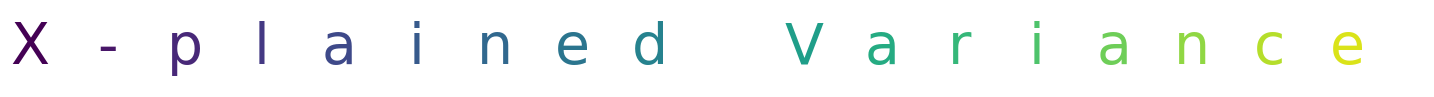

In [30]:
# Create a figure and axis for the text
fig, ax = plt.subplots(figsize=(len(text), 1))  # Adjust the figsize based on the length of text
ax.axis("off")

# The text you want to display
text = "X-plained Variance"

# Generate colors for each character in the text
colors = [plt.cm.viridis(i / len(text)) for i in range(len(text))]

# Initialize x position
x_pos = 0

# Calculate the increment for x based on the figure size
x_increment = 3 / len(text)

# Loop through each character and each color to annotate the character onto the figure
for i, (char, color) in enumerate(zip(text, colors)):
    ax.annotate(char, (x_pos, 0.5), color=color, fontsize=43, ha='center', va='center')
    x_pos += x_increment  # Increment the x position based on the figure size

# Show the plot
plt.show()


$
\Huge Y_{ij} = \beta_{i0}+X_{ij}\beta_{ij} + \epsilon_{ij}, \quad \epsilon_{ij} \sim \mathcal{N}(\mu, \sigma^2)
$
 















































<Details>
   <Summary></Summary>

<b>~/.ssh/id_figurativenarrative</b>

1. Frailty: molecular energy dynamics (cause); $\frac{\partial\frac{ADP}{ATP}}{t}$
2. Hierarchy: cell/tissue, organ/systems, person/env (effect); stress/flow/chill 
3. Stance: truth/control -> knowledge/innovation -> justice/regulation (symptoms); $\cdots$ by their fruits
4. Explain: q&a, exam, labs, time, identity; $\frac{\tau^2}{\tau^2+\sigma^2}$
5. Prescribe: "shrinkage", $Y_{ij}=X_{ij}\beta_{ij}+\epsilon_{{ij}{\sim\}{i.i.d.}}\mathcal{N}(\mu,\sigma^2)}$


---

1. Truth/Red
2. Knowledge/Yellow
3. Morality/Green
4. Variance/Black
5. Data/White

---

Your inquiry is quite intricate, integrating elements of biomedicine, statistics, ethics, and organizational structures, among others. Let's delve into each of the points you've presented:

<b>Frailty: Molecular Energy Dynamics</b><br>
The partial differential equation $\frac{\partial\frac{ADP}{ATP}}{t}$ would signify a change in the ADP to ATP ratio with respect to time. In the context of aging or frailty, this could imply that the energy reserve and metabolic efficiency of cells are diminishing. It would be interesting to connect these molecular energy dynamics with health outcomes in aging populations, potentially providing a mechanistic explanation for frailty.

<b>Hierarchy: Cell to Environment</b><br>
The hierarchical model of cell/tissue, organ/system, and person/environment closely relates to multi-level modeling. This framework could guide your investigations into phenomena like stress, flow, and relaxation (chill), particularly in aging populations.

<b>Stance: Truth, Knowledge, and Justice</b><br>
The hierarchy from "Truth/Control" to "Knowledge/Innovation" and finally to "Justice/Regulation" gives a philosophical backbone to the scientific approach. It also emphasizes the importance of each layer in contributing to a comprehensive understanding, all the way from basic science to societal regulation.

<b>Explain: Measures of Information</b><br>
The ratio $\frac{\tau^2}{\tau^2+\sigma^2}$ appears to be a reliability index that could be useful in determining the quality or credibility of a measure. It could serve to quantify the amount of 'signal' (true underlying variability, $\tau^2$) relative to the 'noise' (error variance, $\sigma^2$).

<b>Prescribe: "Shrinkage"</b><br>
The equation $( Y_{ij}=X_{ij}\beta_{ij}+\epsilon_{{ij}{\sim\}{i.i.d.}}\mathcal{N}(\mu,\sigma^2)}$ is a linear model with normally-distributed errors. Shrinkage here would typically mean moving the estimates of $\beta_{ij}$ toward a central value to reduce the model's complexity and potentially improve its predictive power.

---

<b>Thought Experiments</b><br>
- **Cosmically**: Hierarchical models could be related to the balance of forces (gravity, weight, bonedensity) in star systems.
- **Biologically**: The cell/tissue -> organ/system -> person/environment hierarchy could mirror energy regulation, homeostasis, and allostasis, especially in the context of healthy aging.
- **Socially**: How hierarchies form, behave, and are regulated can have implications for social structures.

By tying together these multidimensional facets, your research and initiatives could push forward a comprehensive view that extends from molecular mechanisms to social constructs, and from empirical data to ethical considerations.

---

ghp-import -n -p -f _build/html -r git@github.com:username/repo.git
</Details>


<Details>
<Summary></Summary>

Announcing Google Cloud Next ’24<br>
April 9-11, 2024<br>
<span style="color:grey;">Mandalay Bay, Convention Center, Las Vegas, NV</span><br>
</Details>